Decision tree dot data saved as decision_tree.dot.

Overfitting analysis with different max_depth values:
Max Depth: None - Train Accuracy: 1.000, Test Accuracy: 0.875
Max Depth: 2 - Train Accuracy: 0.880, Test Accuracy: 0.865
Max Depth: 4 - Train Accuracy: 0.931, Test Accuracy: 0.880
Max Depth: 6 - Train Accuracy: 0.966, Test Accuracy: 0.855
Max Depth: 8 - Train Accuracy: 0.984, Test Accuracy: 0.880
Max Depth: 10 - Train Accuracy: 0.998, Test Accuracy: 0.865

Random Forest - Train Accuracy: 0.902, Test Accuracy: 0.865


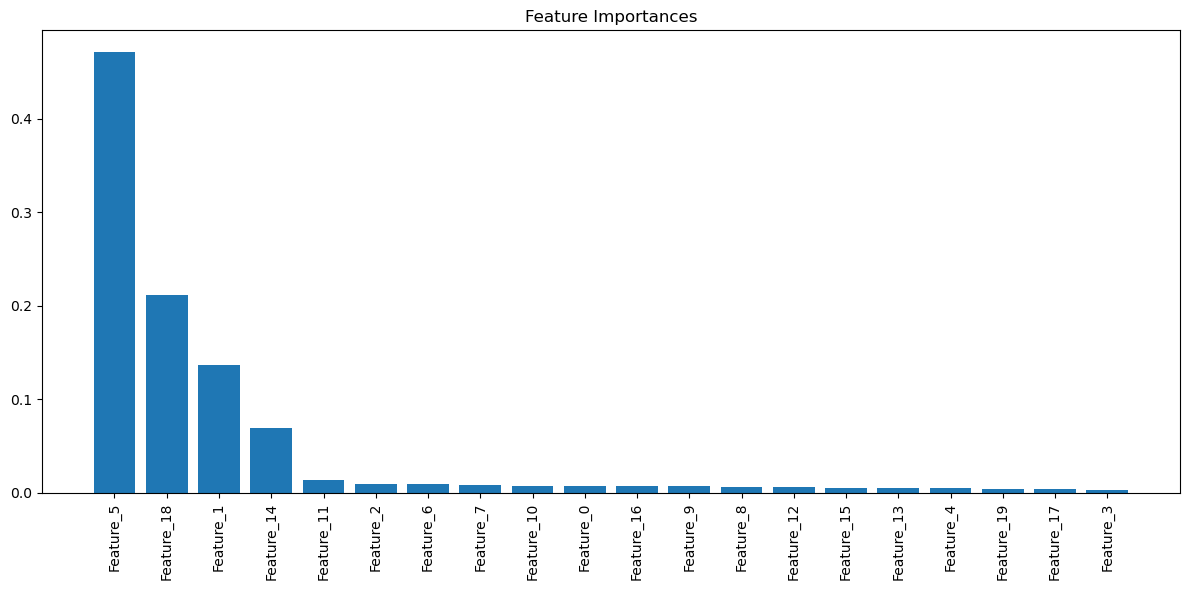


Cross-Validation Accuracy Scores: [0.91  0.895 0.88  0.875 0.85 ]
Mean CV Accuracy: 0.882 ± 0.020


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# 1. Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

# 2. Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Export dot data
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=feature_names,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Save dot data to file
dot_filename = "decision_tree.dot"
with open(dot_filename, "w") as f:
    f.write(dot_data)
print(f"Decision tree dot data saved as {dot_filename}.")

# Optional: if you want to manually generate an image, run in terminal:
# dot -Tsvg decision_tree.dot -o decision_tree.svg
# Remember, this requires Graphviz's dot installed and PATH set.

# The rest of your code:
print("\nOverfitting analysis with different max_depth values:")
depths = [None, 2, 4, 6, 8, 10]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print(f"Max Depth: {depth} - Train Accuracy: {train_score:.3f}, Test Accuracy: {test_score:.3f}")

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"\nRandom Forest - Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")